In [1]:
#Setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir('../data_files') #Set working directory to shorten paths

In [2]:
#Import Data
f12c_mcsum = pd.read_csv('CRESST/Fig12ckgkeVd_Sum.txt',encoding='utf-16',comment="#",header=None)
f12c_NER = pd.read_csv('CRESST/Fig12ckgkeVd_NER.txt',encoding='utf-16',comment="#",header=None)
f12c_AER = pd.read_csv('CRESST/Fig12ckgkeVd_AER.txt',encoding='utf-16',comment="#",header=None)

f3_beta = pd.read_csv('EDW/Fig3_Betas.txt',encoding='utf-16',comment="#",header=None)
f3_cosmo = pd.read_csv('EDW/Fig3_cosmogenics.txt',comment="#",header=None)

f9TL = pd.read_csv('DAMIC/Fig9TL.txt',comment="#",header=None)
f9BL = pd.read_csv('DAMIC/Fig9BL.txt',comment="#",header=None)

f6TR_total = pd.read_csv('SNOLAB/Fig6TR_total.txt',comment="#",header=None)
f6TR_nu = pd.read_csv('SNOLAB/Fig6TR_neutrons.txt',encoding='utf-16',comment="#",header=None)

f6BR_total = pd.read_csv('SNOLAB/Fig6BR_total.txt',encoding='utf-16',comment="#",header=None)
f6BR_nu = pd.read_csv('SNOLAB/Fig6BR_neutrons.txt',encoding='utf-16',comment="#",header=None)

f7TR_total = pd.read_csv('SNOLAB/Fig7TR_total.txt',encoding='utf-16',comment="#",header=None)
f7TR_nu = pd.read_csv('SNOLAB/Fig7TR_neutrons.txt',comment="#",header=None)

f7BR_total = pd.read_csv('SNOLAB/Fig7BR_total.txt',comment="#",header=None)
f7BR_nu = pd.read_csv('SNOLAB/Fig7BR_neutrons.txt',comment="#",header=None)

In [3]:
#analytical forms of EDW III
def tritium(E):
    p0 = 1.406e-8
    p1 = 18.6
    p2 = 511
    return p0*(p1-E)**2*(p2+E)*(E**2+2*p2*E)**(1/2)

def surfbet(E):
    p0 = 1.34
    p1 = -0.058
    p2 = 0.2
    p3 = 40
    p4 = 11.4
    return p0*np.exp(p1*E)+p2*np.exp(-(E-p3)**2/(2*p4**2))

def lead(E):
    p0 = 0.037
    p1 = 0.15
    p2 = 95
    p3 = 5.7
    return p0+p1*np.exp(-(E-p2)**2/(2*p3**2))

def heat(E):
    p0 = 38.2725
    p1 = 0.293
    p2 = 1.4775
    p3 = 0.0812
    return p0*np.exp(-p1*E)+p2*np.exp(-p3*E)

def neutrons(E):
    p0 = 4.827e-4
    p1 = 0.3906
    p2 = 2.986e-4
    p3 = 0.05549
    return p0*np.exp(-p1*E)+p2*np.exp(-p3*E)

def cosmogenics(x):
    for i,y in enumerate(f3_cosmo[0]):
        if abs(x-y) < x/70: # 1% tolerance
            return f3_cosmo[1][i]
    return 0 #if nothing was returned

compton = 1e-1

def f3_total(x):
    return tritium(x)+surfbet(x)+lead(x)+heat(x)+neutrons(x)+[cosmogenics(val) for val in x]+compton

#print([cosmogenics(val) for val in f3_beta[0]]) #debug

# Total Backgrounds

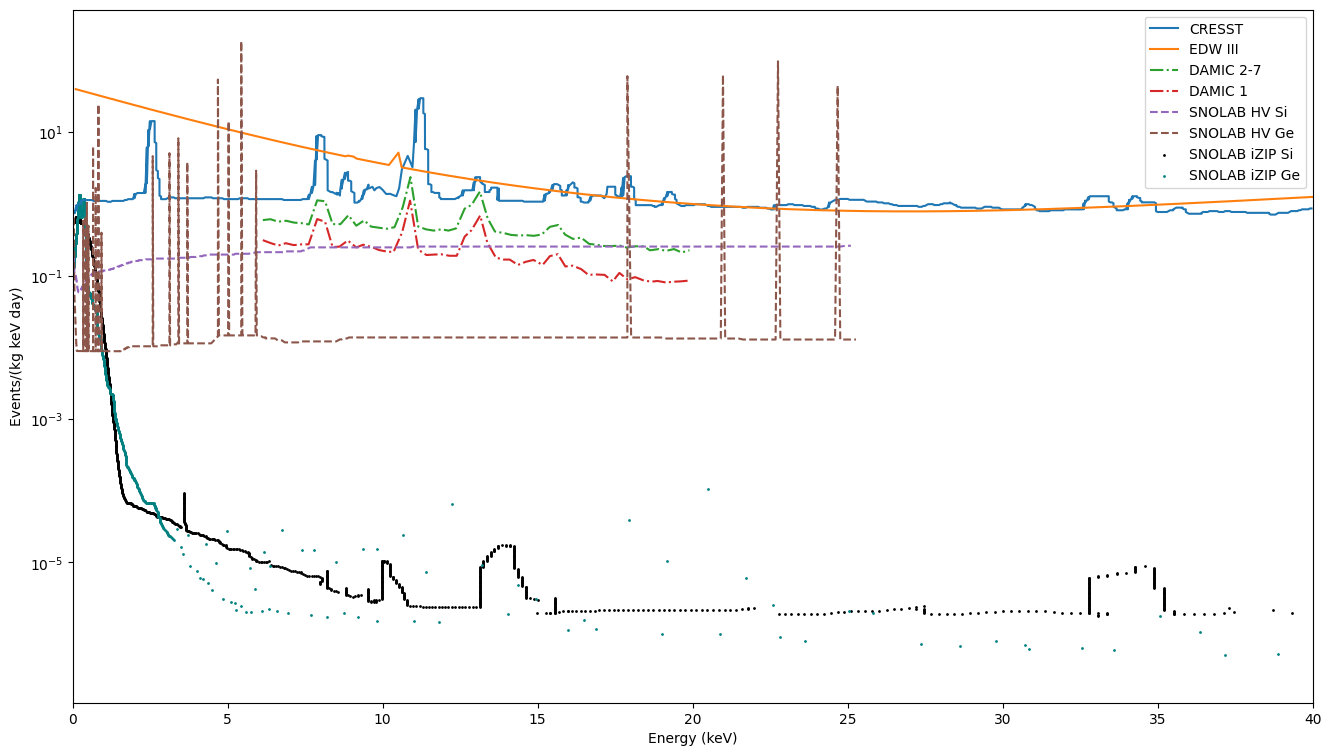

In [4]:
plt.figure(figsize=(16,9))

plt.plot(f12c_mcsum[0],f12c_mcsum[1],label='CRESST')
plt.plot(f3_beta[0],f3_total(f3_beta[0]),label='EDW III')
plt.plot(f9TL[0],f9TL[1]/4/9.3,label='DAMIC 2-7',linestyle='-.') #These are per 1/4 keV so they need to be multiplied by 1/4
plt.plot(f9BL[0],f9BL[1]/4/1.6,label='DAMIC 1',linestyle='-.')   #Then we divide by the exposure in kg*days
plt.plot(f6TR_total[0],f6TR_total[1]/365,label='SNOLAB HV Si',linestyle='--') #Others are in days, these are in years
plt.plot(f6BR_total[0],f6BR_total[1]/365,label='SNOLAB HV Ge',linestyle='--') #1/yr = 1/365 days
plt.scatter(f7TR_total[0],f7TR_total[1]/365,label='SNOLAB iZIP Si',s=1,color='k')#linestyle='--')
plt.scatter(f7BR_total[0],f7BR_total[1]/365,label='SNOLAB iZIP Ge',s=1,color='teal')#linestyle='--')

plt.legend()
plt.xlim(0,40)
plt.yscale('log')
plt.xlabel('Energy (keV)')
plt.ylabel('Events/(kg keV day)')
plt.show()

# Neutron Backgrounds

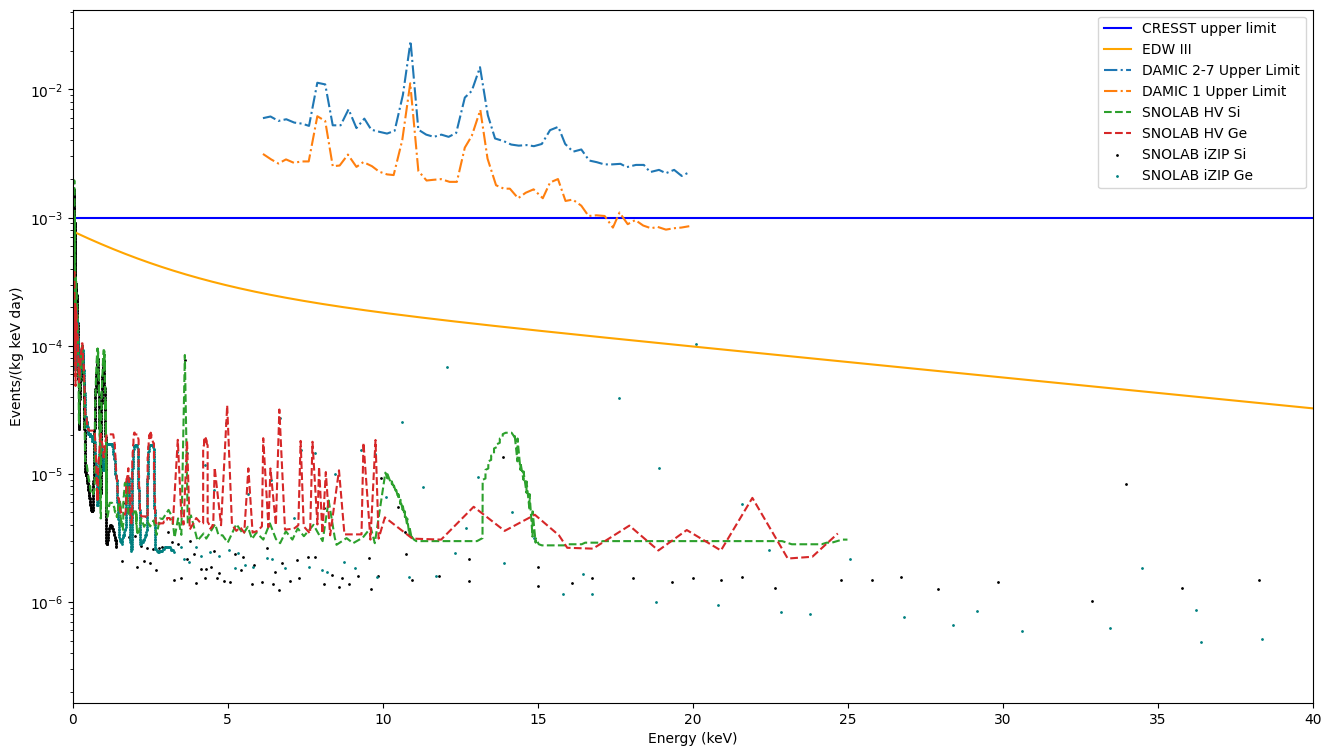

In [5]:
plt.figure(figsize=(16,9))

plt.axhline(1e-3,label='CRESST upper limit',color='b')
plt.plot(f3_beta[0],neutrons(f3_beta[0]),label='EDW III',color='orange')
plt.plot(f9TL[0],f9TL[1]/4/9.3/100,label='DAMIC 2-7 Upper Limit',linestyle='-.') #These are per 1/4 keV so they need to be multiplied by 1/4
plt.plot(f9BL[0],f9BL[1]/4/1.6/100,label='DAMIC 1 Upper Limit',linestyle='-.')   #Then we divide by the exposure in kg*days
#The rest of these need adjusting still
plt.plot(f6TR_nu[0],f6TR_nu[1]/365,label='SNOLAB HV Si',linestyle='--') #Others are in days, these are in years
plt.plot(f6BR_nu[0],f6BR_nu[1]/365,label='SNOLAB HV Ge',linestyle='--') #1/yr = 1/365 days
plt.scatter(f7TR_nu[0],f7TR_nu[1]/365,label='SNOLAB iZIP Si',s=1,color='k')#linestyle='--')
plt.scatter(f7BR_nu[0],f7BR_nu[1]/365,label='SNOLAB iZIP Ge',s=1,color='teal')#linestyle='--')

plt.legend()
plt.xlim(0,40)
plt.yscale('log')
plt.xlabel('Energy (keV)')
plt.ylabel('Events/(kg keV day)')
plt.show()

# Save
In case I need them again. Otherwise I'll delete them after I'm done with the other plots.